In [37]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
#%matplotlib inline
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud
    
# Storing the sets of punctuation in variable result 

In [38]:
df = pd.read_csv('/content/drive/MyDrive/review_data.csv')

In [39]:
df = df[['title', 'asin', 'overall', 'brand', 'reviewText', 'summary']]

In [40]:
#df.describe(include='all')
df.dtypes

title          object
asin           object
overall       float64
brand          object
reviewText     object
summary        object
dtype: object

In [41]:
df.apply(pd.to_numeric, errors="ignore").applymap(lambda x: isinstance(x, float), na_action='ignore').any()

title         False
asin          False
overall        True
brand         False
reviewText    False
summary       False
dtype: bool

In [42]:
fig = px.histogram(df, x='overall', title="Game Review Ratings")
#fig.show()

In [43]:
first_dialogue = df.loc[10, "reviewText"]

res = re.sub(r'[^\w\s]', '', first_dialogue)
print(res)

4 Stars because they like it and play it often enough so dont feel like money is wasted I got them one each so they can multiplay with each other


In [44]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
wordList = wordpunct_tokenize(res) 

wList = []

for r in wordList:
    if not r in stop_words:
      wList.append(r)
#wList

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['4',
 'Stars',
 'like',
 'play',
 'often',
 'enough',
 'dont',
 'feel',
 'like',
 'money',
 'wasted',
 'I',
 'got',
 'one',
 'multiplay']

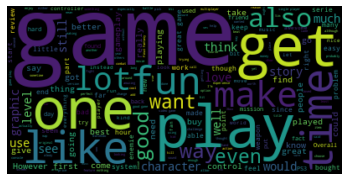

In [45]:
# # Create stopword list:
# stopwords = set(stop_words)
# stopwords.update(["br", "href"])
# textt = " ".join(str(review) for review in df.reviewText)
# #textt = " ".join(wList)
# wordcloud = WordCloud(stopwords=stopwords).generate(textt)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.savefig('wordcloud11.png')
# plt.show()

In [46]:
df['sentiment'] = df['overall'].apply(lambda rating : +1 if rating > 3 else (0 if rating == 3 else -1))

In [47]:
#df

,title,asin,overall,brand,reviewText,summary,sentiment
0,Anno 2070,0700026657,5.0,Ubisoft,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1
1,Anno 2070,0700026657,4.0,Ubisoft,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1
2,Anno 2070,0700026657,3.0,Ubisoft,ok game.,Three Stars,0
3,Anno 2070,0700026657,2.0,Ubisoft,"found the game a bit too complicated, not what...",Two Stars,-1
4,Anno 2070,0700026657,5.0,Ubisoft,"great game, I love it and have played it since...",love this game,1
...,...,...,...,...,...,...,...
273651,Resident Evil 7 Biohazard [Online Game Code],B01H3Z4MYE,4.0,Capcom,"Bought the game directly from Steam, finished ...",Good enough if you get it at discount price,1
273652,Resident Evil 7 Biohazard [Online Game Code],B01H3Z4MYE,4.0,Capcom,Firstly I love this game it was very very scar...,Solid game but.....,1
273653,Resident Evil 7 Biohazard [Online Game Code],B01H3Z4MYE,2.0,Capcom,I think the original MYST was more exciting th...,Total waste of time and money.,-1
273654,The Sims 4 Kids Room Stuff [Online Game Code],B01HH6JEOC,3.0,ElectronicArts,Okay stuff.,Three Stars,0


In [48]:
fig = px.histogram(df, x = 'sentiment', title= 'Aggregated Sentiment Counts')
#fig.show()

In [49]:
#Stopwords to add to list: Game, get, play, one

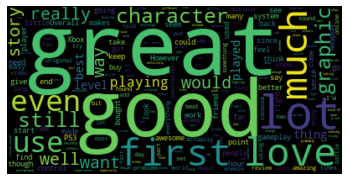

In [50]:
# #Positive Sentiment WordCloud
# df_pos = df[df['sentiment'] == 1]

# # Create stopword list:
# stopwords = set(stop_words)
# stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])
# textt = " ".join(str(review) for review in df_pos.reviewText)
# #textt = " ".join(wList)
# wordcloud = WordCloud(stopwords=stopwords).generate(textt)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.savefig('wordcloud11.png')
# plt.show()

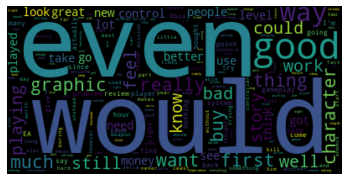

In [51]:
# #Negative Sentiment WordCloud
# df_neg = df[df['sentiment'] == -1]

# # Create stopword list:
# stopwords = set(stop_words)
# stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])
# textt = " ".join(str(review) for review in df_neg.reviewText)
# #textt = " ".join(wList)
# wordcloud = WordCloud(stopwords=stopwords).generate(textt)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.savefig('wordcloud11.png')
# plt.show()

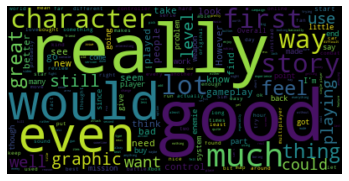

In [52]:
# #Neutral Sentiment WordCloud
# df_n = df[df['sentiment'] == 0]

# # Create stopword list:
# stopwords = set(stop_words)
# stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])
# textt = " ".join(str(review) for review in df_n.reviewText)
# #textt = " ".join(wList)
# wordcloud = WordCloud(stopwords=stopwords).generate(textt)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.savefig('wordcloud11.png')
# plt.show()

In [53]:
#Stopwords to add to list: Game, get, play, one

In [54]:
# Remove Updated Stop Words and Punctuation from Column
# Create updated DataFrame
# Vectorize Words
# Test Train Split
# Create Naive Method to establish Baseline
# Create 3 Tree/Emsemble Classifiers
# Establish Error Metrics 

In [55]:
#stopwords

In [56]:
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]+', '')

<ipython-input-56-b9d71e0edbfe>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [57]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([str(word) for word in str(x).split() if word not in (stopwords)]))

In [58]:
data = df[["reviewText", "sentiment"]]

In [59]:
#data

,reviewText,sentiment
0,This bit hard hang great,1
1,I played alright The steam bit trouble The mov...,1
2,ok,0
3,found bit complicated I expected played 1602 1...,-1
4,great I love played since arrived,1
...,...,...
273651,Bought directly Steam finished unlocked unlock...,1
273652,Firstly I love scary intense If good PC good h...,1
273653,I think original MYST exciting Its puzzle disg...,-1
273654,Okay stuff,0


In [60]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the review text
review_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(data.reviewText)]
#display the tagged docs
#review_docs

In [61]:
model = Doc2Vec(vector_size=64, min_count=1, epochs = 20)

In [63]:
#instantiate model
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(review_docs)
#train model
model.train(review_docs, total_examples=model.corpus_count
            , epochs=model.epochs)

In [64]:
review2vec = [model.infer_vector((data['reviewText'][i].split(' '))) 
            for i in range(0,len(data['reviewText']))]
#review2vec

In [65]:
#Create a list of lists
dtv= np.array(review2vec).tolist()
#set list to dataframe column
data['review2vec'] = dtv
data.head(2)

<ipython-input-65-adeff4fe9a00>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviewText,sentiment,review2vec
0,This bit hard hang great,1,"[-0.05142159387469292, -0.14518198370933533, -..."
1,I played alright The steam bit trouble The mov...,1,"[0.9165043234825134, -0.3964974582195282, -0.1..."


In [67]:
data.to_csv('vec_review_data.csv')

In [ ]:
# !pip install texthero

# import texthero as hero
# from texthero import preprocessing

In [ ]:
# data['tsner2v'] = hero.tsne(data['review2vec'])

In [ ]:
# hero.scatterplot(df, col='tsner2v', color='convertedManaCost'
#                  , title="Doc2Vec", hover_data = ['name','text'])